In [1]:
from imports import *
from exactDiagMethods import *
from globalMethods import  *
from vqteMethods import *
from compare import *

## H imag * iH real
## Compare matricies in seperate file
## Look at Joaquins python file for this 

In [2]:
def main():
    # Initialize the simulation parameters
    N = 2
    gamma_L= 0.5
    gamma_R = 1.0
    eps = 1
    mu_L= 0.25
    mu_R= 1
    T_L = 10   
    T_R= 1
    beta_L=1/T_L
    beta_R=1/T_R
    F_L = 1/(np.exp(beta_L*(eps-mu_L))+1)
    F_R = 1/(np.exp(beta_R*(eps-mu_R))+1)
    J = 1
    
    #Layer = 2

    eps_list = []

    for i in range(N):
        eps_list.append(1)

  
    time = 6.0
    dt = 0.1
    nt = int(time/dt)

    

    exact_diag_ham = build_exact_diag_hamiltonian(J, eps_list)

    #print("Exact Ham", exact_diag_ham)

    ham_real, ham_imag = hamiltonian_generation(N, eps_list, gamma_L, gamma_R, F_L, F_R, J)

    
    
    # Generate initial states
    vqte_init_state, exact_diag_init_state, ansatz, init_param_values = build_initial_states(ham_real)



    exact_diag_results, superoperator = perform_exact_diag(gamma_L,F_L, gamma_R, F_R, dt, nt, exact_diag_init_state,exact_diag_ham, N)
    
    #print("This is important", superoperator - (ham_imag.to_matrix()+ 1j*ham_real.to_matrix()))
    
    #print("Difference", compare_superoperator_to_vqte(superoperator, ham_real, ham_imag) )
    
    verify_algebra(superoperator, ham_real, ham_imag)
    
    diagnose_mismatch(superoperator, ham_real, ham_imag)
    
    #print("Superoperator from exact diag method: ", superoperator)
    vqte_results, numoplist = perform_vqte(ham_real, ham_imag, vqte_init_state, dt, nt, ansatz, init_param_values)
    
    #print("Difference", compare_superoperator_to_vqte(superoperator, ham_real, ham_imag) )
    
    #print("Number Operators: ", numoplist)
    # # Output results
    output_results(vqte_results, exact_diag_results, time, nt)


 Algebra Check
h_end mismatch Norm diff: 13.527853113682925
h_real is Hermitian
i*h_imag is Anti-Hermitian
h_real extraction correct
 h_imag extraction correct
Max difference: 3.8890872965260117
Diagonal Difference Norm: 7.07116715491088
Off-Diagonal Difference Norm: 11.532623506067058
>> Diagnosis: Both parts are different. Likely a Basis/Vectorization mismatch (e.g., A⊗B vs B⊗A).
Step 0 out of 60
Step 1 out of 60
Step 2 out of 60
Step 3 out of 60
Step 4 out of 60
Step 5 out of 60
Step 6 out of 60
Step 7 out of 60
Step 8 out of 60
Step 9 out of 60
Step 10 out of 60
Step 11 out of 60
Step 12 out of 60
Step 13 out of 60
Step 14 out of 60
Step 15 out of 60
Step 16 out of 60
Step 17 out of 60
Step 18 out of 60
Step 19 out of 60
Step 20 out of 60
Step 21 out of 60
Step 22 out of 60
Step 23 out of 60
Step 24 out of 60
Step 25 out of 60
Step 26 out of 60
Step 27 out of 60
Step 28 out of 60
Step 29 out of 60
Step 30 out of 60
Step 31 out of 60
Step 32 out of 60
Step 33 out of 60
Step 34 out 

c:\Users\tessa\Documents\GitHub\open-quantum-systems-simulation\.venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\tessa\Documents\GitHub\open-quantum-systems-simulation\.venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


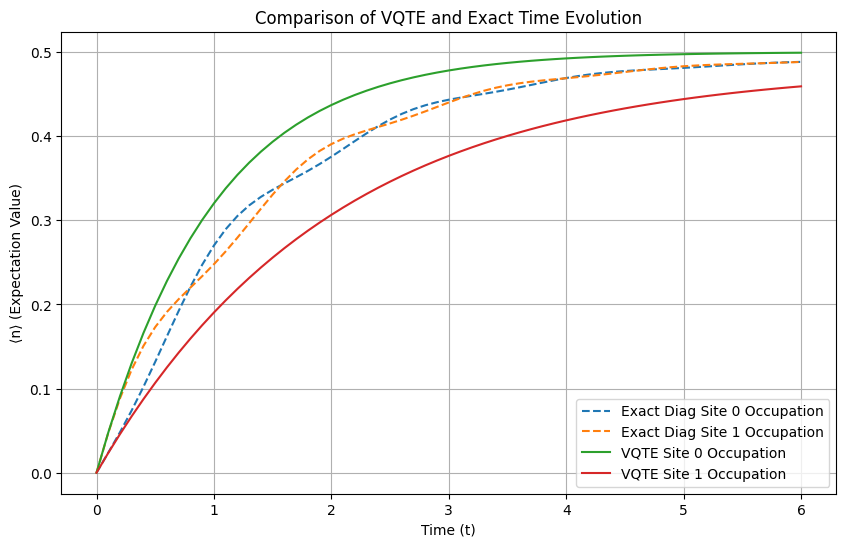

In [3]:
main()